In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("proshares_analysis_data.csv")
data

,Unnamed: 0,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
0,8/31/11,-0.032149,-0.025588,-0.025689,-0.027035,-0.006491
1,9/30/11,-0.038903,-0.032414,-0.032593,-0.032466,-0.022142
2,10/31/11,0.026858,0.043593,0.043320,0.050532,0.025241
3,11/30/11,-0.013453,-0.012142,-0.012431,-0.028608,-0.007965
4,12/31/11,-0.004479,0.001938,0.001796,0.012875,0.001854
...,...,...,...,...,...,...
137,1/31/23,0.026600,0.034428,0.034050,0.035244,0.029164
138,2/28/23,-0.006382,-0.001587,-0.001932,-0.002426,-0.008538
139,3/31/23,-0.008032,-0.004996,-0.004926,-0.006959,0.005856
140,4/30/23,0.002378,0.000852,0.000333,-0.000440,0.005135


In [4]:
data.set_index('Unnamed: 0', inplace=True)
data.index.name = 'Date'
data

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
Date,,,,,
8/31/11,-0.032149,-0.025588,-0.025689,-0.027035,-0.006491
9/30/11,-0.038903,-0.032414,-0.032593,-0.032466,-0.022142
10/31/11,0.026858,0.043593,0.043320,0.050532,0.025241
11/30/11,-0.013453,-0.012142,-0.012431,-0.028608,-0.007965
12/31/11,-0.004479,0.001938,0.001796,0.012875,0.001854
...,...,...,...,...,...
1/31/23,0.026600,0.034428,0.034050,0.035244,0.029164
2/28/23,-0.006382,-0.001587,-0.001932,-0.002426,-0.008538
3/31/23,-0.008032,-0.004996,-0.004926,-0.006959,0.005856


In [8]:
#Question 1 
#A) 
mean = data.mean()*12
mean

HFRIFWI Index     0.041447
MLEIFCTR Index    0.030670
MLEIFCTX Index    0.029239
HDG US Equity     0.019442
QAI US Equity     0.016958
dtype: float64

In [9]:
#B) 
vol = data.std()*np.sqrt(12)
vol

HFRIFWI Index     0.060416
MLEIFCTR Index    0.057147
MLEIFCTX Index    0.056985
HDG US Equity     0.059589
QAI US Equity     0.049895
dtype: float64

In [12]:
#C) 
sharpe = mean/vol
sharpe

HFRIFWI Index     0.686023
MLEIFCTR Index    0.536686
MLEIFCTX Index    0.513102
HDG US Equity     0.326268
QAI US Equity     0.339873
dtype: float64

In [14]:
#Question 2
#A) 
skew = data.skew()
skew

HFRIFWI Index    -0.979063
MLEIFCTR Index   -0.244981
MLEIFCTX Index   -0.231032
HDG US Equity    -0.233880
QAI US Equity    -0.461338
dtype: float64

In [15]:
#B) 
kurt = data.kurtosis()
kurt

HFRIFWI Index     5.955123
MLEIFCTR Index    1.689648
MLEIFCTX Index    1.657903
HDG US Equity     1.799098
QAI US Equity     1.825993
dtype: float64

In [16]:
#C) 
var = data.quantile(.05)
var

HFRIFWI Index    -0.025324
MLEIFCTR Index   -0.028764
MLEIFCTX Index   -0.029119
HDG US Equity    -0.031209
QAI US Equity    -0.020593
Name: 0.05, dtype: float64

In [33]:
#D) 
cvar = data[data <= var].dropna().mean()
cvar

HFRIFWI Index    -0.047557
MLEIFCTR Index   -0.036764
MLEIFCTX Index   -0.036759
HDG US Equity    -0.039023
QAI US Equity    -0.034960
dtype: float64

In [36]:
#E)
columns = data.columns

results = []

for column in columns:
    hf_series = data[column]
    cum_returns = (1+hf_series).cumprod()
    running_max = cum_returns.cummax()
    drawdown = (cum_returns - running_max) / running_max
    max_drawdown = drawdown.min()
    end_date = drawdown.idxmin()
    start_date = cum_returns[:end_date].idxmax()
    post_drawdown = cum_returns[end_date:]
    recovery_date = post_drawdown[post_drawdown >= running_max[start_date]].index.min()
    
    results.append({
        "Index" : column,
        "Max Drawdown" : max_drawdown,
        "Start Date" : start_date,
        "End Date" : end_date, 
        "Recovery Date" : recovery_date
    })
        
results_df = pd.DataFrame(results)
results_df

,Index,Max Drawdown,Start Date,End Date,Recovery Date
0,HFRIFWI Index,-0.115473,12/31/19,3/31/20,1/31/21
1,MLEIFCTR Index,-0.124302,6/30/21,9/30/22,NaN
2,MLEIFCTX Index,-0.124388,6/30/21,9/30/22,NaN
3,HDG US Equity,-0.140721,6/30/21,9/30/22,NaN
4,QAI US Equity,-0.137712,6/30/21,9/30/22,NaN


In [45]:
#3
#A) 
merrills = pd.read_csv("merrills.csv")
merrills.set_index("Unnamed: 0", inplace = True)
merrills.index.name = "Date"
merrills

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
Date,,,,,,
8/31/11,-0.054976,0.000008,-0.092549,-0.087549,-0.005889,-0.088913
9/30/11,-0.069449,0.000017,-0.179064,-0.108083,0.142180,-0.111541
10/31/11,0.109147,-0.000013,0.162986,0.096275,-0.069502,0.151012
11/30/11,-0.004064,0.000000,-0.019723,-0.021764,0.054627,-0.003783
12/31/11,0.010440,0.000008,-0.043017,-0.022139,0.075581,0.005114
...,...,...,...,...,...,...
1/31/23,0.062887,0.003868,0.091292,0.090037,-0.025467,0.098188
2/28/23,-0.025143,0.003974,-0.075677,-0.030748,0.059930,-0.017234
3/31/23,0.037125,0.003911,0.032173,0.031291,-0.045368,-0.048459


In [46]:
spy = merrills["SPY US Equity"]
spy

Date
8/31/11    -0.054976
9/30/11    -0.069449
10/31/11    0.109147
11/30/11   -0.004064
12/31/11    0.010440
              ...   
1/31/23     0.062887
2/28/23    -0.025143
3/31/23     0.037125
4/30/23     0.015975
5/31/23     0.004616
Name: SPY US Equity, Length: 142, dtype: float64

In [48]:
datas = data.join(spy, how='inner')
datas

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity,SPY US Equity
Date,,,,,,
8/31/11,-0.032149,-0.025588,-0.025689,-0.027035,-0.006491,-0.054976
9/30/11,-0.038903,-0.032414,-0.032593,-0.032466,-0.022142,-0.069449
10/31/11,0.026858,0.043593,0.043320,0.050532,0.025241,0.109147
11/30/11,-0.013453,-0.012142,-0.012431,-0.028608,-0.007965,-0.004064
12/31/11,-0.004479,0.001938,0.001796,0.012875,0.001854,0.010440
...,...,...,...,...,...,...
1/31/23,0.026600,0.034428,0.034050,0.035244,0.029164,0.062887
2/28/23,-0.006382,-0.001587,-0.001932,-0.002426,-0.008538,-0.025143
3/31/23,-0.008032,-0.004996,-0.004926,-0.006959,0.005856,0.037125


In [71]:
import statsmodels.api as sm

def calculate_regression_stats(data, spy):
    df = pd.concat([data, spy], axis=1).dropna()
    data_aligned = df.iloc[:, 0]
    spy_aligned = df.iloc[:, 1]
    
    X = sm.add_constant(spy_aligned)
    model = sm.OLS(data_aligned, X).fit()
    
    beta = model.params[1]
    
    mean_return = data_aligned.mean() * 12  
    risk_free_rate = 0  
    treynor_ratio = (mean_return - risk_free_rate) / beta
    
    residuals = model.resid
    tracking_error = residuals.std() * np.sqrt(12)  
    information_ratio = (mean_return - spy_aligned.mean() * 12) / tracking_error  
    
    return beta, treynor_ratio, information_ratio

results = []

for column in datas.columns:
    if column != 'SPY US Equity':
        data = datas[column]
        spy = datas['SPY US Equity']
        
        beta, treynor_ratio, information_ratio = calculate_regression_stats(data, spy)
        
        results.append({
            'Index': column,
            'Market Beta': beta,
            'Treynor Ratio': treynor_ratio,
            'Information Ratio': information_ratio
        })

results_df = pd.DataFrame(results)
print(results_df);

            Index  Market Beta  Treynor Ratio  Information Ratio
0   HFRIFWI Index     0.348217       0.119027          -2.701748
1  MLEIFCTR Index     0.349859       0.087664          -3.874899
2  MLEIFCTX Index     0.348514       0.083896          -3.926423
3   HDG US Equity     0.359536       0.054075          -3.918088
4   QAI US Equity     0.294096       0.057662          -4.441465


/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_78493/1062339232.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_78493/1062339232.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_78493/1062339232.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bet

**Question 4**
<br>**a)** From our results, we see that the market beta values are all below 1, which indicates that the hedge fund series are less volatile than the SPY US Equity series. They are also in similar ranges (mostly around 0.34 exclusiding the QAI US Equity) which suggests that their level of sensitivity to market changes are similar.
<br> Meanwhile, the results also show positive but low Treynor Ratios which suggests that the hdege funds provide some excess returns for additional units of beta/risk, but that these excess returns are not very high. We see that these excess returns for additional risks is the highest for the HFRIFWI Index while the lowest for the HDG US Equity. 
<br> Since the information ratios are all negative, it can be deduced that after adjusting for risk, these funds don't consistently outperform the SPY US Equity. The negative sign also indicates that the tracking errors are high in relation to excess returns. 
<br>
<br> **b)** Since the HDG US Equity has a higher market beta, it indicates that the HDG is more sensitive to market movements. In addition, the HDG also has a lower Treynor ratio which implies that it provides less excess return per unit of systematic risk than the QAI US Equity. Lastly, while both have negative information ratios, the QAI has a slightly more negative value which implies that HDG has a relatively better performance compared to QAI when adjusted for risk. However, since both are negative, they will both have underperformed after adjusting for risk. 
<br> In all, it seems that while the QAI has a slightly better Treynor Ratio by a difference of around 0.003, since the HDG has a less negative information ratio, it most likely performs better in risk-adjusted terms. 
<br>
<br> **c)** The market betas for the ML series are similar to the HFRIFWI index, which indicates a similar sensitivity to market movements although the HDG US Equity has a slighlty higher beta but is still comparable. 
<br> The HFRIFWI Index has the highest Treynor ratio, which implies that it provides better excess returns per unit of systematic risk. On the other hand, the ML series have lower Treynor ratios, which indicates lower excess returns in relation to systematic risk. 
<br> Looking at the information ratio, the HFRIFWI Index has a less negative value compared to the ML series and the HDG US equity, which suggests the former performs relatively better when considering risk-adjusted performance. 
<br>In all, while HDG and the ML series have similar market betas to the HFRIFWI Index, the HFRIFWI index performs better in terms of Treynor and Information ratios. Hence it may be deduced that while they capture some properties of the HFRI< the HFRIFWI Index has a better risk-adjusted performance.

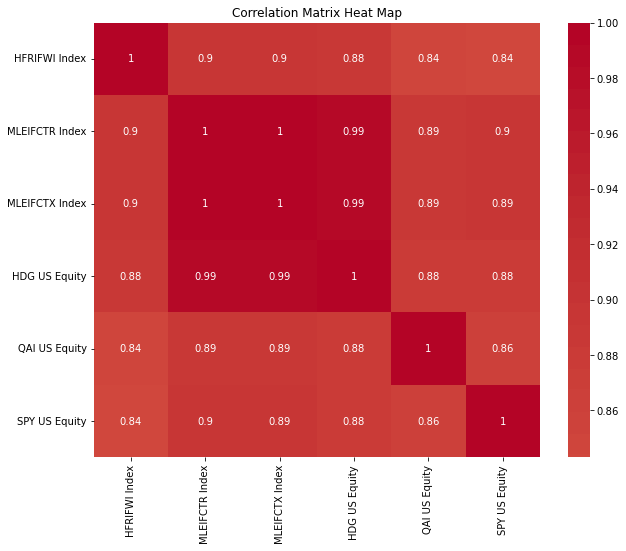

In [80]:
#Question 5
#A) 
corr = datas.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heat Map')
plt.show()

In [82]:
#B) 
correlation_pairs = corr.unstack().sort_values(kind="quicksort")
correlation_pairs = correlation_pairs[correlation_pairs < 1.0]
highest_correlation = correlation_pairs.tail(1)
lowest_correlation = correlation_pairs.head(1)

print(f"Highest correlation pair:\n{highest_correlation}")
print(f"Lowest correlation pair:\n{lowest_correlation}")

Highest correlation pair:
MLEIFCTR Index  MLEIFCTX Index    0.999925
dtype: float64
Lowest correlation pair:
HFRIFWI Index  SPY US Equity    0.843011
dtype: float64


In [89]:
#Question 6
#A) 
hfri = datas['HFRIFWI Index']

combined = hfri.to_frame().join(merrills, how='inner')

y = combined['HFRIFWI Index']
X = combined.drop(columns=['HFRIFWI Index'])

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

intercept = model.params[0]
betas = model.params[1:]
print(f"Intercept: {intercept}")
print(f"Betas:\n{betas}")

Intercept: 0.0014828586776511098
Betas:
SPY US Equity    0.029963
USGG3M Index    -0.370915
EEM US Equity    0.079118
EFA US Equity    0.084161
EUO US Equity    0.023106
IWM US Equity    0.153294
dtype: float64


/var/folders/_2/j77t762d3ggchd7v2qswy79h0000gn/T/ipykernel_78493/3491990923.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]


In [90]:
#B) 
betas_analysis = betas.apply(lambda x: 'High' if abs(x) > 1 else 'Realistic')
print(f"Betas Analysis:\n{betas_analysis}")

Betas Analysis:
SPY US Equity    Realistic
USGG3M Index     Realistic
EEM US Equity    Realistic
EFA US Equity    Realistic
EUO US Equity    Realistic
IWM US Equity    Realistic
dtype: object


In [91]:
#C)
r_squared = model.rsquared
print(f"R-squared: {r_squared}")

R-squared: 0.8360581585953256


In [92]:
#D) 
print(f"Tracking Error (Volatility of Residuals): {tracking_error}")

Tracking Error (Volatility of Residuals): 0.007061704014322156
